# Library

In [1]:
pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 9.6 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 18.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 23.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.0/300.0 kB 45.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 21.8 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install opendatasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 kB 1.8 MB/s eta 0:00:00ta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 kB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.2/78.2 kB 6.3 MB/s eta 0:00:00
  Created wheel for kaggle: filename=kaggle-1.5.13-py3-none-any.whl size=77717 sha256=9e48f9240f6d4b6c9147ae8e72567cb1df5db7c399922db2484f8e3ac6986e86
  Stored in directory: /root/.cache/pip/wheels/e6/8e/67/e07554a720a493dc6b39b30488590ba92ed45448ad0134d253
Successfully built kaggle

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Library to dataset
import opendatasets as od
import os
import zipfile
import numpy as np

# Surpress Warnings
import warnings
warnings.filterwarnings('ignore')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
# library visualization
import matplotlib.pyplot as plt

# Library Tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.applications.xception import Xception
# Others
import shutil
import random

# Load dataset

In [4]:
# Download dataset
od.download('https://www.kaggle.com/datasets/ahmadhabibhasanzein/apple-data')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  ahmadhabibhasanzein


Your Kaggle Key:

  ········


100%|██████████| 216M/216M [00:08<00:00, 27.8MB/s] 


In [5]:
# Load dataset
print("==========================Training Data====================")
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    "apple-data/Apple/train",
    label_mode="categorical",
    class_names=['Apple Black rot', 'Apple Scab Leaf', 'Apple leaf Healthy', 'Apple rust leaf'],
    color_mode="rgb",
    batch_size=1,
    image_size=(256, 256),
    shuffle=True,
    seed=123
)
print("==========================Validation Data====================")
val_data = tf.keras.preprocessing.image_dataset_from_directory(
    "apple-data/Apple/valid",
    label_mode="categorical",
    class_names=['Apple Black rot', 'Apple Scab Leaf', 'Apple leaf Healthy', 'Apple rust leaf'],
    color_mode="rgb",
    batch_size=1,
    image_size=(256, 256),
    shuffle=True,
    seed=123
)

==========================Training Data====================
Found 8014 files belonging to 4 classes.
==========================Validation Data====================
Found 1943 files belonging to 4 classes.


In [7]:
# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator(rescale = 1.0/256.)
test_datagen  = ImageDataGenerator(rescale = 1.0/256.)

# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory("apple-data/Apple/train",
                                                    batch_size=20,
                                                    class_mode='categorical',
                                                    target_size=(224, 224))     
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator =  test_datagen.flow_from_directory("apple-data/Apple/valid",
                                                         batch_size=20,
                                                         class_mode  = 'categorical',
                                                         target_size = (224, 224))

Found 8014 images belonging to 4 classes.
Found 1943 images belonging to 4 classes.


# List Resource

In [8]:
# Check GPU
!nvidia-smi

Sat May 27 06:42:23 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.05    Driver Version: 525.85.05    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  On   | 00000000:02:00.0 Off |                  N/A |
| 30%   33C    P2   107W / 350W |  22725MiB / 24576MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [9]:
# Lis physical devices
devices = tf.config.experimental.list_physical_devices("GPU")
devices

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [10]:
# Define the GPU strategy
mirrored_strategy = tf.distribute.MirroredStrategy(devices=["/gpu:0"])

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)


# Modelling Without ImageDataGenerator

## Xception Model 1

In [11]:
# Difine the callbacks
# Save the best model
checkpoint_callback = ModelCheckpoint(filepath="Apple_Xception_model1_Based_Non_Augmented", save_best_only=True, monitor="val_accuracy", mode="max", verbose=1)

# Early stopping
early_stopping_callback = EarlyStopping(monitor="val_accuracy", mode="max", patience=20, verbose=1, restore_best_weights=True)

# Reduce learning rate
reduce_lr_callback = ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=5, verbose=1, mode="min", min_delta=0.0001, cooldown=0, min_lr=0)

# Callbacks list
callbacks=[checkpoint_callback, early_stopping_callback, reduce_lr_callback]

In [12]:
# Define Model
Xception1_model = tf.keras.models.Sequential([
    # Xception Layer
    Xception(include_top=False,weights='imagenet',input_shape=(224, 224, 3)),
    # Max Pooling Layer
    tf.keras.layers.GlobalMaxPooling2D(),
    # Drop Out Layer
    tf.keras.layers.Dropout(0.2),
    # 256 neuron hidden layer
    tf.keras.layers.Dense(256, activation='relu'),
    # Output
    tf.keras.layers.Dense(4, activation='softmax') 
  ])


# Compile Model
Xception1_model.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy']) 

# Model Summary
Xception1_model.summary()

83683744/83683744 [==============================] - 2s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 global_max_pooling2d (Globa  (None, 2048)             0         
 lMaxPooling2D)                                                  
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 256)               524544    
                                                                 
 dense_1 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 21,387,052
Trainable params: 21,332,524
Non

In [13]:
# Define the number of epochs
num_epochs = 100

# Train the model
history_Xception_model_1 = Xception1_model.fit(train_generator, epochs=num_epochs, validation_data=validation_generator, callbacks=callbacks)

Epoch 1/100
401/401 [==============================] - ETA: 0s - loss: 0.4639 - accuracy: 0.8239
Epoch 1: val_accuracy improved from -inf to 0.96037, saving model to Apple_Xception_model1_Based_Non_Augmented


INFO:tensorflow:Assets written to: Apple_Xception_model1_Based_Non_Augmented/assets


INFO:tensorflow:Assets written to: Apple_Xception_model1_Based_Non_Augmented/assets


401/401 [==============================] - 96s 152ms/step - loss: 0.4639 - accuracy: 0.8239 - val_loss: 0.1201 - val_accuracy: 0.9604 - lr: 0.0010
Epoch 2/100
401/401 [==============================] - ETA: 0s - loss: 0.1290 - accuracy: 0.9653
Epoch 2: val_accuracy did not improve from 0.96037
401/401 [==============================] - 33s 81ms/step - loss: 0.1290 - accuracy: 0.9653 - val_loss: 1.6827 - val_accuracy: 0.8230 - lr: 0.0010
Epoch 3/100
401/401 [==============================] - ETA: 0s - loss: 0.0734 - accuracy: 0.9803
Epoch 3: val_accuracy improved from 0.96037 to 0.98919, saving model to Apple_Xception_model1_Based_Non_Augmented


INFO:tensorflow:Assets written to: Apple_Xception_model1_Based_Non_Augmented/assets


INFO:tensorflow:Assets written to: Apple_Xception_model1_Based_Non_Augmented/assets


401/401 [==============================] - 56s 140ms/step - loss: 0.0734 - accuracy: 0.9803 - val_loss: 0.0360 - val_accuracy: 0.9892 - lr: 0.0010
Epoch 4/100
401/401 [==============================] - ETA: 0s - loss: 0.0801 - accuracy: 0.9797
Epoch 4: val_accuracy improved from 0.98919 to 0.99125, saving model to Apple_Xception_model1_Based_Non_Augmented


INFO:tensorflow:Assets written to: Apple_Xception_model1_Based_Non_Augmented/assets


INFO:tensorflow:Assets written to: Apple_Xception_model1_Based_Non_Augmented/assets


401/401 [==============================] - 56s 141ms/step - loss: 0.0801 - accuracy: 0.9797 - val_loss: 0.0333 - val_accuracy: 0.9913 - lr: 0.0010
Epoch 5/100
401/401 [==============================] - ETA: 0s - loss: 0.0576 - accuracy: 0.9860
Epoch 5: val_accuracy did not improve from 0.99125
401/401 [==============================] - 33s 83ms/step - loss: 0.0576 - accuracy: 0.9860 - val_loss: 0.1180 - val_accuracy: 0.9712 - lr: 0.0010
Epoch 6/100
401/401 [==============================] - ETA: 0s - loss: 0.0678 - accuracy: 0.9820
Epoch 6: val_accuracy did not improve from 0.99125
401/401 [==============================] - 33s 83ms/step - loss: 0.0678 - accuracy: 0.9820 - val_loss: 0.0374 - val_accuracy: 0.9902 - lr: 0.0010
Epoch 7/100
401/401 [==============================] - ETA: 0s - loss: 0.0502 - accuracy: 0.9845
Epoch 7: val_accuracy improved from 0.99125 to 0.99279, saving model to Apple_Xception_model1_Based_Non_Augmented


INFO:tensorflow:Assets written to: Apple_Xception_model1_Based_Non_Augmented/assets


INFO:tensorflow:Assets written to: Apple_Xception_model1_Based_Non_Augmented/assets


401/401 [==============================] - 58s 144ms/step - loss: 0.0502 - accuracy: 0.9845 - val_loss: 0.0312 - val_accuracy: 0.9928 - lr: 0.0010
Epoch 8/100
401/401 [==============================] - ETA: 0s - loss: 0.0578 - accuracy: 0.9844
Epoch 8: val_accuracy improved from 0.99279 to 0.99691, saving model to Apple_Xception_model1_Based_Non_Augmented


INFO:tensorflow:Assets written to: Apple_Xception_model1_Based_Non_Augmented/assets


INFO:tensorflow:Assets written to: Apple_Xception_model1_Based_Non_Augmented/assets


401/401 [==============================] - 57s 142ms/step - loss: 0.0578 - accuracy: 0.9844 - val_loss: 0.0150 - val_accuracy: 0.9969 - lr: 0.0010
Epoch 9/100
401/401 [==============================] - ETA: 0s - loss: 0.0254 - accuracy: 0.9926
Epoch 9: val_accuracy improved from 0.99691 to 0.99743, saving model to Apple_Xception_model1_Based_Non_Augmented


INFO:tensorflow:Assets written to: Apple_Xception_model1_Based_Non_Augmented/assets


INFO:tensorflow:Assets written to: Apple_Xception_model1_Based_Non_Augmented/assets


401/401 [==============================] - 57s 142ms/step - loss: 0.0254 - accuracy: 0.9926 - val_loss: 0.0148 - val_accuracy: 0.9974 - lr: 0.0010
Epoch 10/100
401/401 [==============================] - ETA: 0s - loss: 0.0387 - accuracy: 0.9883
Epoch 10: val_accuracy did not improve from 0.99743
401/401 [==============================] - 33s 83ms/step - loss: 0.0387 - accuracy: 0.9883 - val_loss: 0.0234 - val_accuracy: 0.9918 - lr: 0.0010
Epoch 11/100
401/401 [==============================] - ETA: 0s - loss: 0.0289 - accuracy: 0.9918
Epoch 11: val_accuracy did not improve from 0.99743
401/401 [==============================] - 33s 83ms/step - loss: 0.0289 - accuracy: 0.9918 - val_loss: 0.6254 - val_accuracy: 0.8755 - lr: 0.0010
Epoch 12/100
401/401 [==============================] - ETA: 0s - loss: 0.0389 - accuracy: 0.9894
Epoch 12: val_accuracy improved from 0.99743 to 0.99846, saving model to Apple_Xception_model1_Based_Non_Augmented


INFO:tensorflow:Assets written to: Apple_Xception_model1_Based_Non_Augmented/assets


INFO:tensorflow:Assets written to: Apple_Xception_model1_Based_Non_Augmented/assets


401/401 [==============================] - 56s 139ms/step - loss: 0.0389 - accuracy: 0.9894 - val_loss: 0.0033 - val_accuracy: 0.9985 - lr: 0.0010
Epoch 13/100
401/401 [==============================] - ETA: 0s - loss: 0.0345 - accuracy: 0.9904
Epoch 13: val_accuracy did not improve from 0.99846
401/401 [==============================] - 33s 82ms/step - loss: 0.0345 - accuracy: 0.9904 - val_loss: 0.5693 - val_accuracy: 0.8847 - lr: 0.0010
Epoch 14/100
401/401 [==============================] - ETA: 0s - loss: 0.0270 - accuracy: 0.9938
Epoch 14: val_accuracy did not improve from 0.99846
401/401 [==============================] - 34s 84ms/step - loss: 0.0270 - accuracy: 0.9938 - val_loss: 0.0142 - val_accuracy: 0.9964 - lr: 0.0010
Epoch 15/100
401/401 [==============================] - ETA: 0s - loss: 0.0424 - accuracy: 0.9865
Epoch 15: val_accuracy did not improve from 0.99846
401/401 [==============================] - 33s 83ms/step - loss: 0.0424 - accuracy: 0.9865 - val_loss: 0.0181 -

INFO:tensorflow:Assets written to: Apple_Xception_model1_Based_Non_Augmented/assets


INFO:tensorflow:Assets written to: Apple_Xception_model1_Based_Non_Augmented/assets


401/401 [==============================] - 57s 142ms/step - loss: 0.0180 - accuracy: 0.9940 - val_loss: 0.0029 - val_accuracy: 0.9995 - lr: 0.0010
Epoch 17/100
401/401 [==============================] - ETA: 0s - loss: 0.0271 - accuracy: 0.9924
Epoch 17: val_accuracy did not improve from 0.99949
401/401 [==============================] - 34s 84ms/step - loss: 0.0271 - accuracy: 0.9924 - val_loss: 0.0083 - val_accuracy: 0.9990 - lr: 0.0010
Epoch 18/100
401/401 [==============================] - ETA: 0s - loss: 0.0269 - accuracy: 0.9925
Epoch 18: val_accuracy did not improve from 0.99949
401/401 [==============================] - 34s 83ms/step - loss: 0.0269 - accuracy: 0.9925 - val_loss: 0.0132 - val_accuracy: 0.9959 - lr: 0.0010
Epoch 19/100
401/401 [==============================] - ETA: 0s - loss: 0.0252 - accuracy: 0.9940
Epoch 19: val_accuracy did not improve from 0.99949
401/401 [==============================] - 33s 83ms/step - loss: 0.0252 - accuracy: 0.9940 - val_loss: 0.0494 -

INFO:tensorflow:Assets written to: Apple_Xception_model1_Based_Non_Augmented/assets


INFO:tensorflow:Assets written to: Apple_Xception_model1_Based_Non_Augmented/assets


401/401 [==============================] - 56s 140ms/step - loss: 0.0040 - accuracy: 0.9981 - val_loss: 3.3869e-04 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 24/100
401/401 [==============================] - ETA: 0s - loss: 0.0019 - accuracy: 0.9994
Epoch 24: val_accuracy did not improve from 1.00000
401/401 [==============================] - 33s 82ms/step - loss: 0.0019 - accuracy: 0.9994 - val_loss: 2.4978e-04 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 25/100
401/401 [==============================] - ETA: 0s - loss: 0.0011 - accuracy: 0.9998
Epoch 25: val_accuracy did not improve from 1.00000
401/401 [==============================] - 33s 83ms/step - loss: 0.0011 - accuracy: 0.9998 - val_loss: 2.5373e-04 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 26/100
401/401 [==============================] - ETA: 0s - loss: 8.8397e-04 - accuracy: 0.9996
Epoch 26: val_accuracy did not improve from 1.00000
401/401 [==============================] - 34s 84ms/step - loss: 8.8397e-04 - accur

Text(0.5, 1.0, 'Training and validation loss DIY Model')

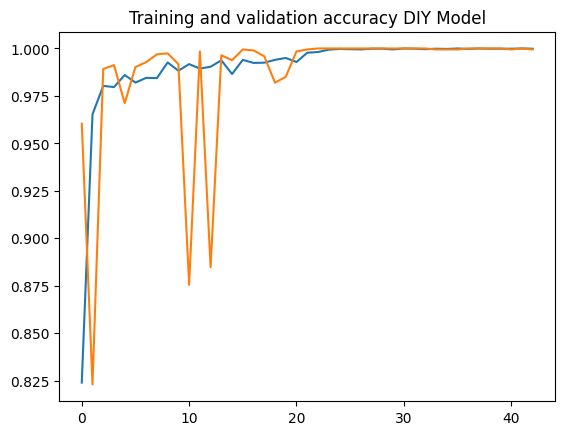

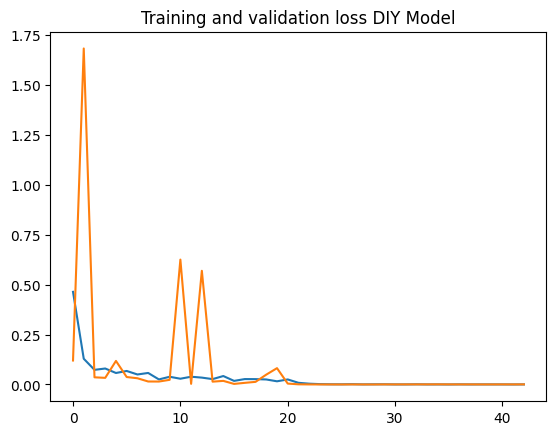

In [14]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history_Xception_model_1.history['accuracy' ]
val_acc  = history_Xception_model_1.history['val_accuracy' ]
loss     = history_Xception_model_1.history['loss' ]
val_loss = history_Xception_model_1.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  (epochs, acc )
plt.plot  (epochs, val_acc )
plt.title ('Training and validation accuracy DIY Model')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  (epochs, loss)
plt.plot  (epochs, val_loss)
plt.title ('Training and validation loss DIY Model')

## Xception Model 2

In [15]:
# Difine the callbacks
# Save the best model
checkpoint_callback = ModelCheckpoint(filepath="Apple_Xception_model2_Based_Non_Augmented", save_best_only=True, monitor="val_accuracy", mode="max", verbose=1)

# Early stopping
early_stopping_callback = EarlyStopping(monitor="val_accuracy", mode="max", patience=20, verbose=1, restore_best_weights=True)

# Reduce learning rate
reduce_lr_callback = ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=5, verbose=1, mode="min", min_delta=0.0001, cooldown=0, min_lr=0)

# Callbacks list
callbacks=[checkpoint_callback, early_stopping_callback, reduce_lr_callback]

In [16]:
# Define Model
Xception_model_2 = tf.keras.models.Sequential([
    # Xception Layer
    Xception(include_top=False,weights='imagenet',input_shape=(224, 224, 3)),
    # Global Average Pooling Layer
    tf.keras.layers.GlobalAveragePooling2D(),
    # Drop Out Layer
    tf.keras.layers.Dropout(0.2),
    # 256 neuron hidden layer
    tf.keras.layers.Dense(256, activation='relu'),
    # Output
    tf.keras.layers.Dense(4, activation='softmax') 
  ])


# Compile Model
Xception_model_2.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy']) 

# Model Summary
Xception_model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout_1 (Dropout)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               524544    
                                                                 
 dense_3 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 21,387,052
Trainable params: 21,332,524
Non-trainable params: 54,528
_____________________________________

In [17]:
# Define the number of epochs
num_epochs = 100

# Train the model
history_Xception_model_2 = Xception_model_2.fit(train_generator, epochs=num_epochs, validation_data=validation_generator, callbacks=callbacks)

Epoch 1/100
401/401 [==============================] - ETA: 0s - loss: 0.2444 - accuracy: 0.9291
Epoch 1: val_accuracy improved from -inf to 0.98353, saving model to Apple_Xception_model2_Based_Non_Augmented


INFO:tensorflow:Assets written to: Apple_Xception_model2_Based_Non_Augmented/assets


INFO:tensorflow:Assets written to: Apple_Xception_model2_Based_Non_Augmented/assets


401/401 [==============================] - 87s 149ms/step - loss: 0.2444 - accuracy: 0.9291 - val_loss: 0.0616 - val_accuracy: 0.9835 - lr: 0.0010
Epoch 2/100
401/401 [==============================] - ETA: 0s - loss: 0.0999 - accuracy: 0.9713
Epoch 2: val_accuracy did not improve from 0.98353
401/401 [==============================] - 34s 84ms/step - loss: 0.0999 - accuracy: 0.9713 - val_loss: 0.0583 - val_accuracy: 0.9835 - lr: 0.0010
Epoch 3/100
401/401 [==============================] - ETA: 0s - loss: 0.0546 - accuracy: 0.9814
Epoch 3: val_accuracy improved from 0.98353 to 0.99022, saving model to Apple_Xception_model2_Based_Non_Augmented


INFO:tensorflow:Assets written to: Apple_Xception_model2_Based_Non_Augmented/assets


INFO:tensorflow:Assets written to: Apple_Xception_model2_Based_Non_Augmented/assets


401/401 [==============================] - 58s 144ms/step - loss: 0.0546 - accuracy: 0.9814 - val_loss: 0.0317 - val_accuracy: 0.9902 - lr: 0.0010
Epoch 4/100
401/401 [==============================] - ETA: 0s - loss: 0.0506 - accuracy: 0.9848
Epoch 4: val_accuracy improved from 0.99022 to 0.99434, saving model to Apple_Xception_model2_Based_Non_Augmented


INFO:tensorflow:Assets written to: Apple_Xception_model2_Based_Non_Augmented/assets


INFO:tensorflow:Assets written to: Apple_Xception_model2_Based_Non_Augmented/assets


401/401 [==============================] - 58s 144ms/step - loss: 0.0506 - accuracy: 0.9848 - val_loss: 0.0241 - val_accuracy: 0.9943 - lr: 0.0010
Epoch 5/100
401/401 [==============================] - ETA: 0s - loss: 0.0453 - accuracy: 0.9858
Epoch 5: val_accuracy did not improve from 0.99434
401/401 [==============================] - 33s 83ms/step - loss: 0.0453 - accuracy: 0.9858 - val_loss: 0.0671 - val_accuracy: 0.9835 - lr: 0.0010
Epoch 6/100
401/401 [==============================] - ETA: 0s - loss: 0.0754 - accuracy: 0.9773
Epoch 6: val_accuracy improved from 0.99434 to 0.99537, saving model to Apple_Xception_model2_Based_Non_Augmented


INFO:tensorflow:Assets written to: Apple_Xception_model2_Based_Non_Augmented/assets


INFO:tensorflow:Assets written to: Apple_Xception_model2_Based_Non_Augmented/assets


401/401 [==============================] - 57s 142ms/step - loss: 0.0754 - accuracy: 0.9773 - val_loss: 0.0225 - val_accuracy: 0.9954 - lr: 0.0010
Epoch 7/100
401/401 [==============================] - ETA: 0s - loss: 0.0336 - accuracy: 0.9893
Epoch 7: val_accuracy improved from 0.99537 to 0.99846, saving model to Apple_Xception_model2_Based_Non_Augmented


INFO:tensorflow:Assets written to: Apple_Xception_model2_Based_Non_Augmented/assets


INFO:tensorflow:Assets written to: Apple_Xception_model2_Based_Non_Augmented/assets


401/401 [==============================] - 58s 144ms/step - loss: 0.0336 - accuracy: 0.9893 - val_loss: 0.0051 - val_accuracy: 0.9985 - lr: 0.0010
Epoch 8/100
401/401 [==============================] - ETA: 0s - loss: 0.0398 - accuracy: 0.9885
Epoch 8: val_accuracy improved from 0.99846 to 0.99949, saving model to Apple_Xception_model2_Based_Non_Augmented


INFO:tensorflow:Assets written to: Apple_Xception_model2_Based_Non_Augmented/assets


INFO:tensorflow:Assets written to: Apple_Xception_model2_Based_Non_Augmented/assets


401/401 [==============================] - 56s 140ms/step - loss: 0.0398 - accuracy: 0.9885 - val_loss: 0.0054 - val_accuracy: 0.9995 - lr: 0.0010
Epoch 9/100
401/401 [==============================] - ETA: 0s - loss: 0.0211 - accuracy: 0.9930
Epoch 9: val_accuracy did not improve from 0.99949
401/401 [==============================] - 33s 83ms/step - loss: 0.0211 - accuracy: 0.9930 - val_loss: 0.0512 - val_accuracy: 0.9835 - lr: 0.0010
Epoch 10/100
401/401 [==============================] - ETA: 0s - loss: 0.0439 - accuracy: 0.9884
Epoch 10: val_accuracy did not improve from 0.99949
401/401 [==============================] - 34s 83ms/step - loss: 0.0439 - accuracy: 0.9884 - val_loss: 0.0049 - val_accuracy: 0.9990 - lr: 0.0010
Epoch 11/100
401/401 [==============================] - ETA: 0s - loss: 0.0196 - accuracy: 0.9930
Epoch 11: val_accuracy did not improve from 0.99949
401/401 [==============================] - 33s 83ms/step - loss: 0.0196 - accuracy: 0.9930 - val_loss: 0.0177 - v

INFO:tensorflow:Assets written to: Apple_Xception_model2_Based_Non_Augmented/assets


INFO:tensorflow:Assets written to: Apple_Xception_model2_Based_Non_Augmented/assets


401/401 [==============================] - 56s 140ms/step - loss: 0.0035 - accuracy: 0.9994 - val_loss: 6.2626e-04 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 19/100
401/401 [==============================] - ETA: 0s - loss: 0.0020 - accuracy: 0.9996
Epoch 19: val_accuracy did not improve from 1.00000
401/401 [==============================] - 33s 82ms/step - loss: 0.0020 - accuracy: 0.9996 - val_loss: 4.2455e-04 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 20/100
401/401 [==============================] - ETA: 0s - loss: 0.0021 - accuracy: 0.9995
Epoch 20: val_accuracy did not improve from 1.00000
401/401 [==============================] - 34s 84ms/step - loss: 0.0021 - accuracy: 0.9995 - val_loss: 5.2225e-04 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 21/100
401/401 [==============================] - ETA: 0s - loss: 0.0011 - accuracy: 0.9999
Epoch 21: val_accuracy did not improve from 1.00000
401/401 [==============================] - 33s 83ms/step - loss: 0.0011 - accuracy: 0.9

Text(0.5, 1.0, 'Training and validation loss DIY Model')

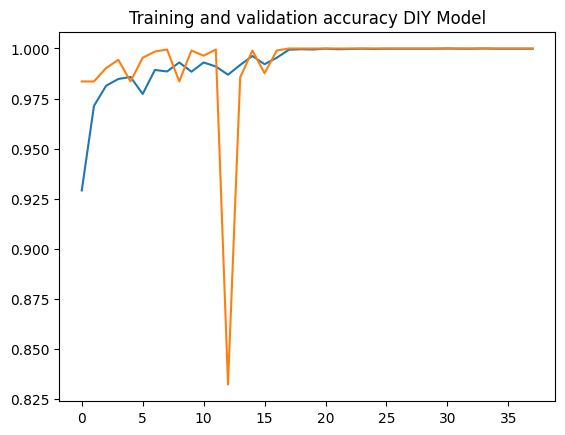

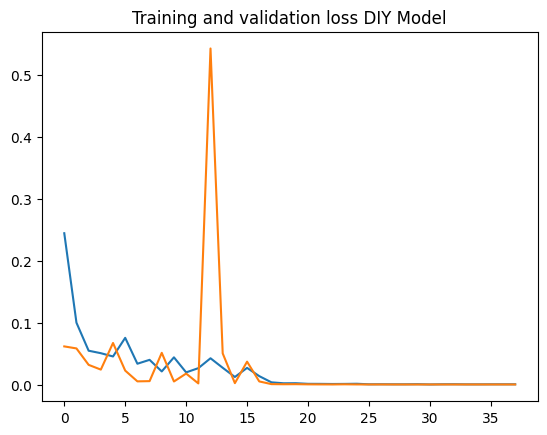

In [18]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history_Xception_model_2.history['accuracy' ]
val_acc  = history_Xception_model_2.history['val_accuracy' ]
loss     = history_Xception_model_2.history['loss' ]
val_loss = history_Xception_model_2.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  (epochs, acc )
plt.plot  (epochs, val_acc )
plt.title ('Training and validation accuracy DIY Model')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  (epochs, loss)
plt.plot  (epochs, val_loss)
plt.title ('Training and validation loss DIY Model')